<a href="https://colab.research.google.com/github/koki-takada-1/machine-learning_summary/blob/main/pca_ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [教育用標準データセット（SSDSE: Standardized Statistical Data Set for Education)](https://www.nstac.go.jp/use/literacy/ssdse/) を使って主成分分析を行う。

In [1]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 8.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=a27517f29d551f8a8a1d1c8576134aff327a8ef82968dea8a1c7c9fc529270c8
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

都道府県庁所在地士別の家庭消費データを集めたテーブルから、魚介類のカラムを使って主成分分析を行う。

魚介類のカラムは当該テーブルの20番目から55番目の位置にある。

よって、以下のようなコードになる。

In [9]:
df = pd.read_excel('https://www.nstac.go.jp/sys/files//SSDSE-C-2022.xlsx',skiprows=1)
cl = list(df)[20:55]
cl.insert(0,'都道府県')
df = df[cl]
df = df.iloc[1:]
df

,都道府県,まぐろ,あじ,いわし,かつお,かれい,さけ,さば,さんま,たい,...,他の塩干魚介,揚げかまぼこ,ちくわ,かまぼこ,他の魚肉練製品,かつお節・削り節,魚介の漬物,魚介のつくだ煮,魚介の缶詰,他の魚介加工品のその他
1,北海道,5129,164,233,1049,1549,8028,789,785,510,...,9583,1596,1476,3667,1120,608,5167,693,2958,4484
2,青森県,5124,648,637,1390,1636,6736,688,897,580,...,10890,1590,1772,2872,1188,534,6414,506,3562,4306
3,岩手県,5863,461,399,2339,1131,5758,601,944,413,...,9590,1471,1688,3179,1026,664,4087,739,3408,4424
4,宮城県,6664,599,332,3029,1137,5571,602,904,528,...,7958,1713,1150,9112,1504,700,4243,922,3897,3856
5,秋田県,5377,904,577,1584,2194,5506,723,918,806,...,8613,1483,1429,2898,1136,679,4978,1643,3314,3406
6,山形県,5813,405,237,2412,1001,4301,364,653,615,...,8897,1974,1797,3637,1842,779,3551,935,3795,3673
7,福島県,6794,458,357,3027,990,4570,567,724,539,...,7627,2493,1579,3877,1945,758,4544,969,3675,3581
8,茨城県,5523,570,305,2436,748,4996,647,724,472,...,6056,1648,1099,2794,1406,743,2601,1118,3115,2733
9,栃木県,8193,667,295,1589,554,4969,729,663,485,...,6341,2114,1432,2644,1524,830,3449,861,3360,3030
10,群馬県,7759,702,354,1166,630,5951,775,566,501,...,5875,1871,1720,2482,1297,883,4123,1074,3401,3241


35種類の魚介類の品目に関して、47都道府県庁所在市別の年間支出額が収録されたデータである。

したがって、データ $X$ は47×35の行列で表される。

In [11]:
len(cl[1:])

35

In [12]:
X = df.iloc[:,1:].values
X

array([[5129,  164,  233, ...,  693, 2958, 4484],
       [5124,  648,  637, ...,  506, 3562, 4306],
       [5863,  461,  399, ...,  739, 3408, 4424],
       ...,
       [3130, 2016,  605, ...,  465, 2651, 2369],
       [3119, 1693, 1014, ...,  552, 2647, 2292],
       [5199,  199,  158, ...,  186, 5603, 1884]])

$X$ の各事例に対応する都道府県名を変数 $C$ に保存しておく。

In [13]:
C = df.iloc[:,0].values
C

array(['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
       '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府',
       '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
       '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
       '鹿児島県', '沖縄県'], dtype=object)

$X$ の品目名を変数 $F$ に保存しておく。

In [14]:
F = df.columns[1:].values
F

array(['まぐろ', 'あじ', 'いわし', 'かつお', 'かれい', 'さけ', 'さば', 'さんま', 'たい', 'ぶり',
       'いか', 'たこ', 'えび', 'かに', '他の鮮魚', 'さしみ盛合わせ', 'あさり', 'しじみ', 'かき（貝）',
       'ほたて貝', '他の貝', '塩さけ', 'たらこ', 'しらす干し', '干しあじ', '他の塩干魚介', '揚げかまぼこ',
       'ちくわ', 'かまぼこ', '他の魚肉練製品', 'かつお節・削り節', '魚介の漬物', '魚介のつくだ煮', '魚介の缶詰',
       '他の魚介加工品のその他'], dtype=object)

sklearn.decomposition.PCAを用いて主成分分析を実行する。

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
P = pca.fit_transform(X)

In [17]:
pd.DataFrame(pca.components_, columns=F, index=[f'PC{i+1}' for i in range(pca.n_components_)])

,まぐろ,あじ,いわし,かつお,かれい,さけ,さば,さんま,たい,ぶり,...,他の塩干魚介,揚げかまぼこ,ちくわ,かまぼこ,他の魚肉練製品,かつお節・削り節,魚介の漬物,魚介のつくだ煮,魚介の缶詰,他の魚介加工品のその他
PC1,0.762347,-0.121254,-0.032894,0.054943,-0.026324,0.117297,-0.046809,0.027062,-0.139565,-0.242326,...,0.080279,-0.123858,-0.070828,0.042551,0.057496,0.003880,0.330593,0.048772,0.152890,0.130957
PC2,0.200828,0.007516,-0.019907,0.056385,-0.171414,-0.207313,0.020435,-0.039075,0.009291,-0.075465,...,-0.516602,0.062320,-0.021227,-0.162800,0.018670,0.095578,-0.370987,-0.023682,0.061745,-0.173197
PC3,-0.044986,-0.035727,-0.021337,0.592643,0.033968,-0.159938,-0.011671,0.014886,-0.007805,0.052748,...,0.355752,0.091749,0.137233,0.063743,0.028975,-0.021045,-0.139308,-0.035413,-0.096301,0.016108
PC4,-0.446906,-0.134992,-0.017720,-0.141563,0.092653,0.073346,-0.062968,0.024246,-0.125126,-0.384243,...,0.062454,-0.180649,-0.014175,-0.196490,-0.107022,-0.012809,0.108447,-0.109457,0.212788,0.084111
PC5,-0.133340,0.076930,-0.001175,0.220171,-0.129361,-0.053254,-0.029878,-0.002011,-0.023458,-0.024820,...,-0.071204,0.112424,-0.128632,0.796331,-0.014073,0.012611,0.046388,-0.093502,0.125327,0.056064
PC6,-0.092332,0.073357,0.042557,-0.101932,0.081566,-0.092432,0.034496,-0.038760,-0.137174,0.473891,...,-0.162602,0.062813,0.009759,0.096764,0.149880,-0.082818,0.387742,0.011664,-0.105147,-0.035736
PC7,0.004504,-0.079360,-0.017895,-0.262539,0.164484,0.047567,-0.006742,0.023657,-0.207935,-0.175609,...,-0.158060,-0.422593,0.103033,0.397630,0.159863,0.030879,-0.164635,0.003926,0.126658,-0.084569
PC8,0.034491,0.022806,0.007758,-0.203256,-0.054363,0.444567,0.059136,-0.005581,0.057112,-0.001651,...,-0.111172,0.512052,0.002880,0.006383,-0.048276,0.048544,0.254788,-0.133257,0.024853,-0.034931
PC9,-0.087667,-0.062227,-0.071298,0.305943,-0.048927,0.131348,-0.011006,0.012292,-0.087153,0.348559,...,-0.416278,-0.439063,-0.140380,-0.163656,-0.214928,0.008663,0.258778,-0.029290,0.018134,0.032347
PC10,0.094101,0.351644,0.036604,-0.244328,-0.164001,-0.077601,-0.004427,-0.045688,-0.075584,0.182625,...,0.278765,-0.278370,0.096611,0.014452,0.172266,-0.150371,0.093416,-0.105120,-0.252678,0.009105


In [18]:
pd.options.display.float_format = '{:.4f}'.format
pd.DataFrame(P, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=C)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
北海道,2487.8389,-4966.0528,-320.8543,1017.6841,-579.2019,-1563.3956,858.8621,1458.3418,-140.1767,-308.6281,...,69.2063,-3.6319,-49.4450,0.6462,-113.4204,111.4089,14.9725,-8.2478,0.4031,-19.1240
青森県,2972.5545,-5912.2859,644.3723,1599.8627,-983.4241,-1154.3755,-443.8427,1088.6792,107.4413,873.5569,...,-106.7636,55.5440,-42.4428,-44.1413,88.6324,-44.7429,-25.4713,-2.8300,-6.5612,-4.1540
岩手県,3194.9839,-2214.3202,1486.4946,1782.4909,328.0760,-818.1272,-590.4603,-251.6618,82.2356,341.3754,...,-207.2679,203.6574,66.3286,-43.2917,-0.7008,-87.2589,112.8981,-10.2045,19.3570,19.6595
宮城県,3517.2942,-2585.6387,617.6396,-1305.5068,5282.4655,-848.6894,1981.8864,-332.1339,-132.5546,-567.0850,...,-44.2820,-39.3242,125.3246,30.9031,47.7002,-16.1194,4.1519,-46.0273,-59.1861,-5.3594
秋田県,2253.2739,-3703.5570,-926.2875,677.9090,-260.5768,-359.4548,-617.2389,-999.1186,295.3406,-822.1465,...,-32.8092,-65.2901,-78.1968,-137.7047,16.3399,38.0546,46.9992,29.3046,-43.5699,5.3235
山形県,2945.1983,-774.8239,2153.3586,1780.4628,661.6390,11.6232,-462.7772,-800.6361,-769.3300,-168.6118,...,217.2941,-66.8712,-34.0918,-36.1188,-43.6305,-78.6573,-60.7440,-17.4872,-17.9000,-23.0861
福島県,4002.3968,316.6880,1712.8046,1232.2133,1138.2288,694.3302,-669.8674,-251.6412,-503.2171,-373.8722,...,276.9075,292.4046,44.0171,50.9703,-150.9932,30.1684,11.5520,34.2857,39.0531,28.3520
茨城県,2042.2105,2294.0244,532.4056,1505.5751,436.7112,180.3861,-340.7217,-882.7576,377.6176,-216.9224,...,-169.5463,29.2724,-180.4278,78.5391,42.9000,-78.8442,-62.5491,-42.2624,22.5908,-0.9527
栃木県,4132.8555,2176.7776,135.4488,340.8337,-595.1232,220.2804,-28.1605,46.6282,-550.5560,146.2686,...,-110.3916,-29.6172,-0.2071,-65.2436,-90.3663,-45.2899,13.7392,107.7700,65.5509,-7.5921
群馬県,3915.2823,1430.0856,-1280.8459,376.7899,-548.6658,-244.9171,-225.0418,344.1131,167.7751,267.9101,...,-90.8468,-104.4481,-69.2207,-38.9535,-51.7739,-35.9250,-29.7286,-81.8095,26.5118,-13.5715


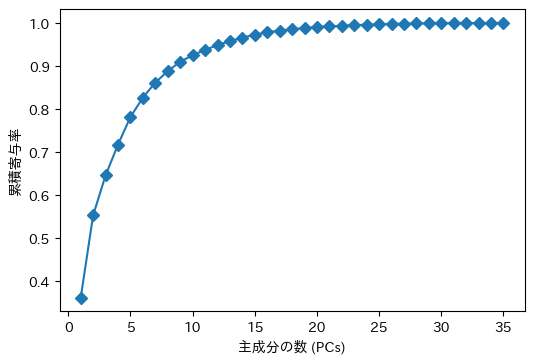

In [20]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)

ax.plot(np.arange(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_),'-D')
ax.set_xlabel('主成分の数 (PCs)')
ax.set_ylabel('累積寄与率')
fig.show()

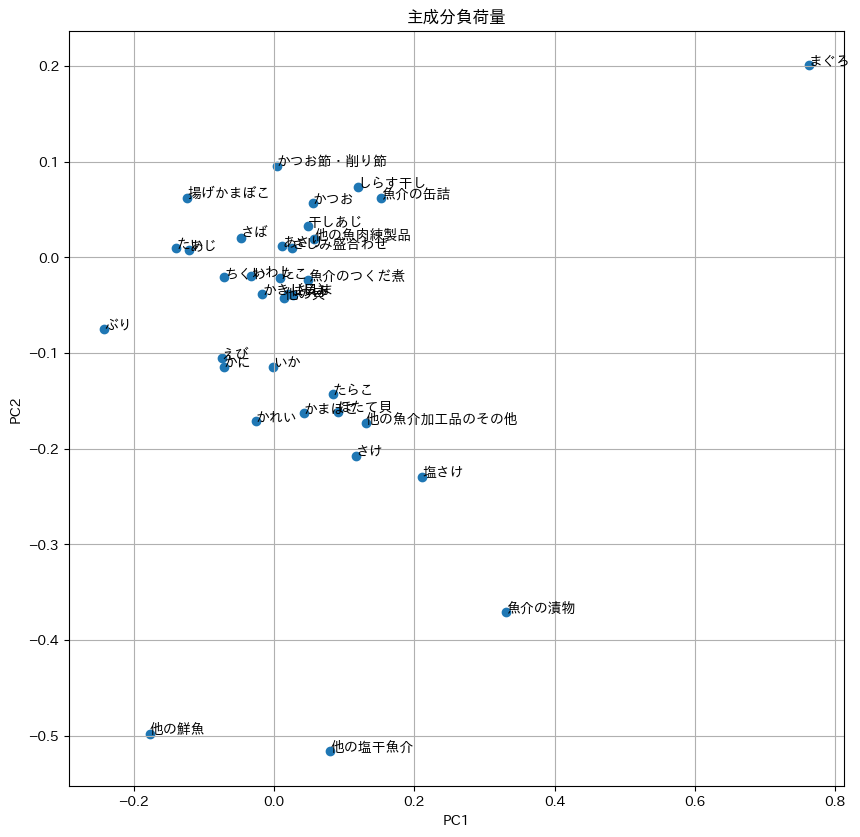

In [22]:
plt.figure(dpi=100,figsize=(10,10))
for x,y,name in zip(pca.components_[0],pca.components_[1],F):
    plt.text(x,y,name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.grid()
plt.title('主成分負荷量')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

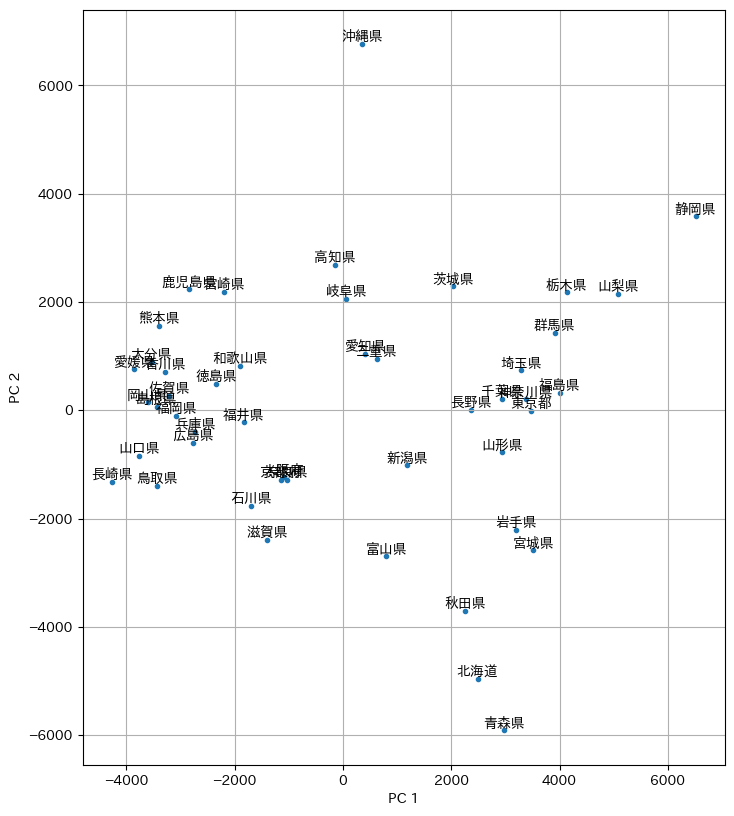

In [21]:
fig = plt.figure(dpi=100, figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
m = ax.scatter(P[:, 0], P[:, 1], marker='.')
for i, label in enumerate(C):
    ax.text(P[i][0], P[i][1], label, ha='center', va='bottom')
ax.set_aspect('equal')
ax.grid()
fig.show()

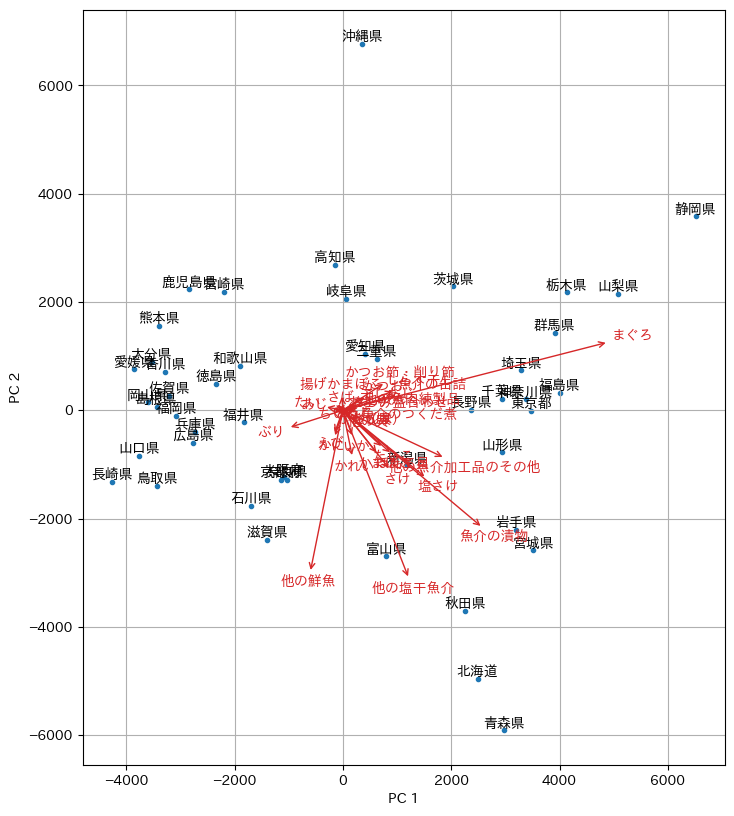

In [27]:
fig = plt.figure(dpi=100, figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_aspect('equal')

m = ax.scatter(P[:, 0], P[:, 1], marker='.')
for i, label in enumerate(C):
    ax.text(P[i][0], P[i][1], label, ha='center', va='bottom')

for i, label in enumerate(F):
    ax.annotate(
        label, xy=(0, 0), xytext=pca.components_[:2,i] * 6500,
        color="tab:red", arrowprops=dict(arrowstyle='<-', color="tab:red")
    )
ax.grid()
fig.show()